###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Agenda:

<font color=darkblue>
&nbsp;
    
Learn about Univariate and Multivariate Data Analysis.


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:
  
<font color=darkblue>

&nbsp;

1. Import necessary libraries and Load Data
2. Univariate Data Analysis
3. Checking distribution of data - distplot, violin plot, histograms, commulative distributions
4. Multivariate Data Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv')

#### This dataset contains 22 columns. For the sake of univariate analysis let us use just one column of data - 'Distance'.

In [3]:
data = data['Distance']

In [4]:
len(data)

34857

#### The first step is to check if the data has any missing values. Some plots will not work in the presence of missing values. So we need to take care of them.

In [5]:
data.isnull().sum()

1

#### There is one missing value out of a total of 34857 observations. For now we can drop that one missing value. Dealing with missing values will be dealt with in a later section.

In [6]:
print(f'before droping null len : {len(data)}')
data = data.dropna() # drops all missing values in the data
print(f'after droping null len : {len(data)}')

before droping null len : 34857
after droping null len : 34856


# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Univariate Analysis


<font color=darkblue> Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis.
    
Let us take the 'Melbourne Housing' dataset and work on that for the univariate analysis.

####   <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">  Now let us check the distribution of the data.
    
#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> What does the distribution of data tell us?


<font color=darkblue>
    
* The plot displayed below is called as a Histogram
    
* The X-axis groups the observations from minimum to maximum along the axis on the basis of the discrete points or class intervals

* The Y-axis measures the frequency of occurance of observations for each discrete point or class interval.

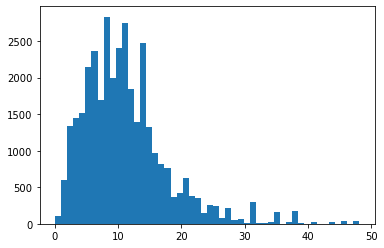

In [8]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(data, bins=50);

**In the above histogram, the first array is the frequency in each class and the second array contains the edges of the class intervals. These arrays can be assigned to a variable and used for further analysis.**

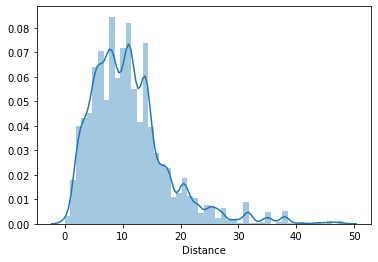

In [8]:
sns.distplot(data) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

<AxesSubplot:xlabel='Distance', ylabel='Density'>

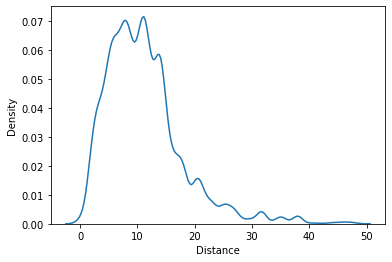

In [9]:
sns.distplot(data, hist=False) # adding an argument to plot only frequency polygon

**This distribution can also be visualised in another manner. For this we can use the violin plot function from seaborn. The violin plot shows a vertical mirror image of the distribution along with the original distribution.**

<AxesSubplot:xlabel='Distance'>

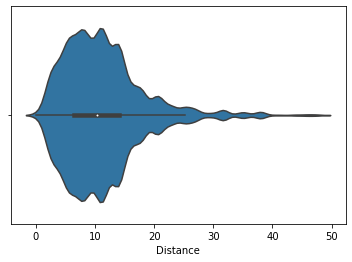

In [10]:
sns.violinplot(data) # plots a violin plt using the seaborn package.

### Now let us have a closer look at the distribution by plotting a simple histogram with 10 bins.

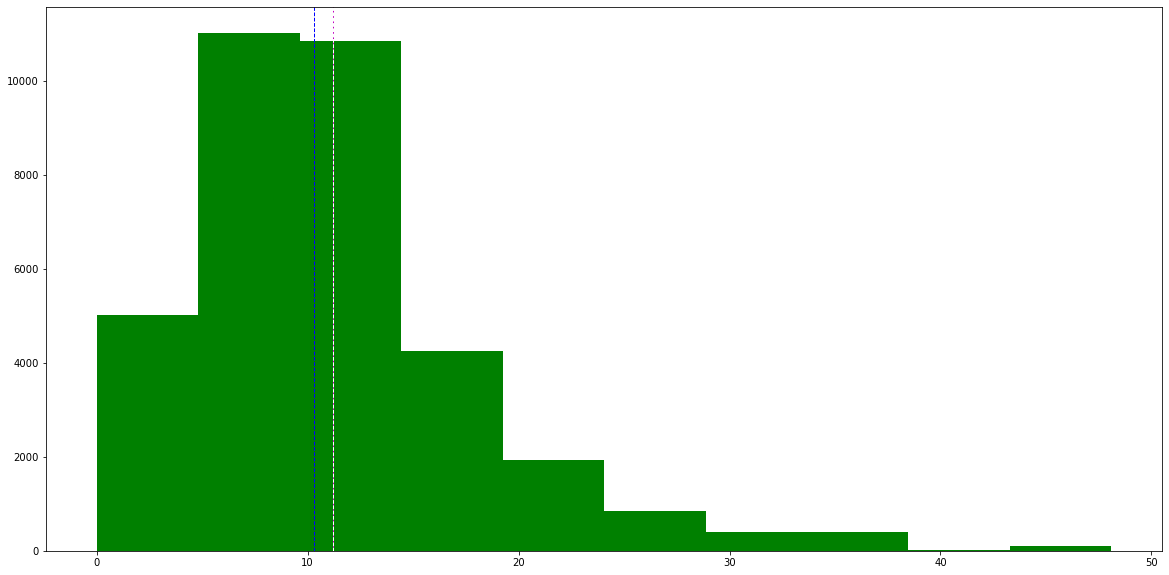

In [11]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data, color='g') # plots a simple histogram
plt.axvline(data.mean(), color='m', linewidth=1)
plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=1)

<font color=darkblue>
    
- In the above histogram we can see that the second bin with class limits (4.81,  9.62) has the most number of observations. 
- A bulk of the observations lie within the first four classes. The rest of the six classes contain only a very few observations.
- In this case we are measuring distances. We can safely say based on visual observation that most of the distance present on the data are less than 20 kms.
- There are a very few distances that are more than 20 kms. Once we pass the 30 km point the number of observations dlrops further.
- From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the blue line.
- We can see from the above figure that the mode and the mean are very close to each other and that the median is lower than both.

#### Now we have an idea of how the data is distributed.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Cumulative Distribution

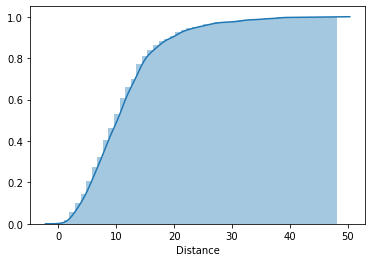

In [12]:
sns.distplot(data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Multivariate analysis

<font color=darkblue>
    
#### Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2
#### ex: Pairplot, 3D scatter plot

#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Scatter Plot


<font color=darkblue>

#### A Scatter plot gives us an idea of the association between two variables

In [13]:
data1 = pd.read_csv('Melbourne_housing_FULL.csv')

In [14]:
data1.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [15]:
print(f'before droping null len : {len(data1)}')
data1 = data1.dropna().reset_index(drop=True)
print(f'after droping null len : {len(data1)}')

before droping null len : 34857
after droping null len : 8890


In [ ]:
sns.pairplot(data1)


**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**

**A scatter plot can also be plotted for two individual columns:**

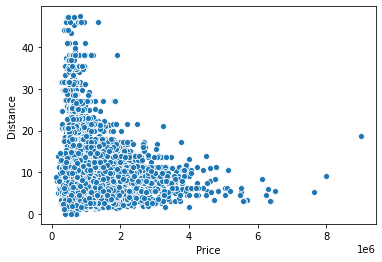

In [17]:
sns.scatterplot(data1['Price'], data1['Distance'])  # Plots the scatter plot using two variables

**The scatter plot only offers visual information about the degree of correlation. In order to obtain more precise information we can use the inbuilt .corr() method in Pandas. This returns a table with all the correlations calculated for the numerical columns.**

In [18]:
data1.corr()   # displays the correlation between every possible pair of attributes as a dataframe

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
Rooms,1.000000,0.276490,0.084078,0.964475,0.624138,0.401395,0.101178,0.006944,0.019001,0.082831,-0.082604,0.475096
Distance,0.276490,1.000000,0.489550,0.283365,0.122035,0.259328,0.138568,0.313238,-0.055374,0.163922,-0.003173,-0.231222
Postcode,0.084078,0.489550,1.000000,0.087130,0.111470,0.055520,0.069603,0.089862,-0.195195,0.358014,0.032741,0.045962
Bedroom,0.964475,0.283365,0.087130,1.000000,0.626560,0.405543,0.101054,0.016320,0.022983,0.082491,-0.081207,0.460906
Bathroom,0.624138,0.122035,0.111470,0.626560,1.000000,0.310975,0.075939,0.192965,-0.041642,0.109141,-0.058255,0.463524
Car,0.401395,0.259328,0.055520,0.405543,0.310975,1.000000,0.123466,0.139322,0.015157,0.035530,-0.031244,0.209439
Landsize,0.101178,0.138568,0.069603,0.101054,0.075939,0.123466,1.000000,0.037696,0.042509,-0.008211,-0.032504,0.058394
YearBuilt,0.006944,0.313238,0.089862,0.016320,0.192965,0.139322,0.037696,1.000000,0.100042,-0.026872,0.017093,-0.313629
Latitude,0.019001,-0.055374,-0.195195,0.022983,-0.041642,0.015157,0.042509,0.100042,1.000000,-0.345845,0.029863,-0.224117
Longtitude,0.082831,0.163922,0.358014,0.082491,0.109141,0.035530,-0.008211,-0.026872,-0.345845,1.000000,0.026186,0.212117


**The same can be represented graphically using a the heatmap function in seaborn.**

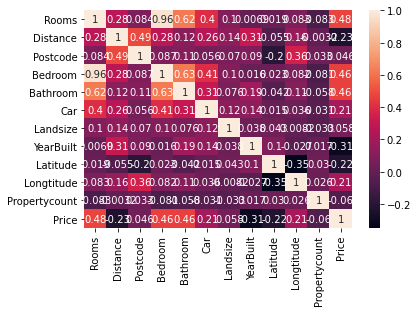

In [19]:
sns.heatmap(data1.corr(), annot=True)  # plot the correlation coefficients as a heatmap